In [1]:
# Importing dependecies
import pandas as pd
import json
import requests
import prettytable
from config import api_key
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Dictionary of series ID 
category_dict = {
    'CXUFOODAWAYLB1101M': 'Food Away',
    'CXUAPPARELLB1101M': 'Apparel',
    'CXUENTRTAINLB1101M': 'Entertainment',
    'CXUCASHCONTLB1101M': 'Cash Contribution',
    'CXUALCBEVGLB1101M': 'Alcohol Beverages',
    'CXUEDUCATNLB1101M': 'Education',
    'CXUPERSCARELB1101M': 'Personal Care',
    'CXUTOBACCOLB1101M': 'Tobacco'
}

# List of series IDs
category_list = list(category_dict.keys())

In [3]:
# Load the json response for the API queries
def json_df(dictionary):
    headers = {'Content-type': 'application/json'}
    data = json.dumps({"seriesid": list(dictionary.keys()),"startyear":"2005", "endyear":"2018","registrationkey":api_key})
    p = requests.post('https://api.bls.gov/publicAPI/v2/timeseries/data/', data=data, headers=headers)
    json_data = json.loads(p.text)

    try:
        df = pd.DataFrame()

        # Loops through the json response to create a DataFrame
        for series in json_data['Results']['series']:
            # Create an initial DataFrame with column of Series IDs and dictionary of data
            df_initial = pd.DataFrame(series)
            series_col = df_initial['seriesID'][0]

            # Loops through the length of the initial DF to split up its second column
            for i in range(0, len(df_initial) - 1):
                df_row = pd.DataFrame(df_initial['data'][i])
                df_row['seriesID'] = series_col
                if 'code' not in str(df_row['footnotes']): 
                    df_row['footnotes'] = ''
                else:
                    df_row['footnotes'] = str(df_row['footnotes']).split("'code': '",1)[1][:1]
                df = df.append(df_row, ignore_index=True)

    except:
        json_data['status'] == 'REQUEST_NOT_PROCESSED'
        print('BLS API has given the following Response:', json_data['status'])
        print('Reason:', json_data['message'])
    return df

In [4]:
def get_total(df):
    # Initialize variables
    total = []
    dict_list = []
    i = 0
    
    # Convert the value column to float - a numeric data type will be needed to visualize the data
    df['value'] = df['value'].astype(float)
    
    series_set = set(df["seriesID"])
    for e in series_set:
        dict_list.append(e)
    
    dict_list = sorted(dict_list)
    
    # Loop through series list to create a list of the totals of each spending category
    for key in dict_list:
        # Append a value to a list to record the spending for each category
        total.append(int(df.groupby('seriesID')['value'].sum()[key]))

        # Counter
        i = i + 1
    return total

In [6]:
total = get_total(df_category)

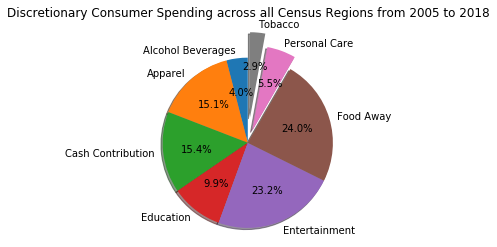

In [7]:
# Labels of the categories
labels = sorted(list(category_dict.values()))

# Explode the two smallest expenses (i.e Tobacco and Personal Care)
explode = (0, 0, 0, 0, 0, 0, .15, .3)  

# Initialize figure and axis
fig1, ax1 = plt.subplots()

# Create pie chart of the breakdown of discretionary spending
ax1.pie(total, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.title('Discretionary Consumer Spending across all Census Regions from 2005 to 2018')
plt.xlabel('')
plt.ylabel('')
plt.show()

In [8]:
df_category = df_category.sort_values(['seriesID','year'], ascending = True).reset_index(drop=True)
df_category

,year,period,periodName,latest,value,footnotes,seriesID
0,2006,A01,Annual,NaN,497.0,,CXUALCBEVGLB1101M
1,2007,A01,Annual,NaN,457.0,,CXUALCBEVGLB1101M
2,2008,A01,Annual,NaN,444.0,,CXUALCBEVGLB1101M
3,2009,A01,Annual,NaN,435.0,,CXUALCBEVGLB1101M
4,2010,A01,Annual,NaN,412.0,,CXUALCBEVGLB1101M
...,...,...,...,...,...,...,...
99,2014,A01,Annual,NaN,319.0,,CXUTOBACCOLB1101M
100,2015,A01,Annual,NaN,349.0,,CXUTOBACCOLB1101M
101,2016,A01,Annual,NaN,337.0,,CXUTOBACCOLB1101M
102,2017,A01,Annual,NaN,332.0,,CXUTOBACCOLB1101M


In [9]:
# Get percent change over the years, grouped by series ID
df_category['pct_decimal'] = df_category.groupby(['seriesID'])['value'].pct_change()
df_category['percent_change'] = df_category['pct_decimal'].multiply(100)
df_category

,year,period,periodName,latest,value,footnotes,seriesID,pct_decimal,percent_change
0,2006,A01,Annual,NaN,497.0,,CXUALCBEVGLB1101M,NaN,NaN
1,2007,A01,Annual,NaN,457.0,,CXUALCBEVGLB1101M,-0.080483,-8.048290
2,2008,A01,Annual,NaN,444.0,,CXUALCBEVGLB1101M,-0.028446,-2.844639
3,2009,A01,Annual,NaN,435.0,,CXUALCBEVGLB1101M,-0.020270,-2.027027
4,2010,A01,Annual,NaN,412.0,,CXUALCBEVGLB1101M,-0.052874,-5.287356
...,...,...,...,...,...,...,...,...,...
99,2014,A01,Annual,NaN,319.0,,CXUTOBACCOLB1101M,-0.033333,-3.333333
100,2015,A01,Annual,NaN,349.0,,CXUTOBACCOLB1101M,0.094044,9.404389
101,2016,A01,Annual,NaN,337.0,,CXUTOBACCOLB1101M,-0.034384,-3.438395
102,2017,A01,Annual,NaN,332.0,,CXUTOBACCOLB1101M,-0.014837,-1.483680


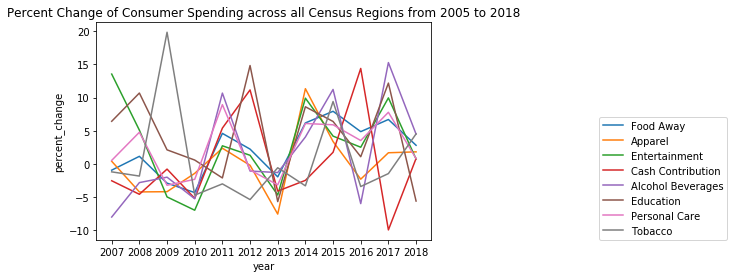

In [10]:
# Produce line chart of percentage change of spend on each item over time
labels = (list(category_dict.values()))
i=0
fig,ax = plt.subplots()
for seriesID in list(category_dict.keys()):
    ax.plot(df_category[df_category.seriesID==seriesID].year,
            df_category[df_category.seriesID==seriesID].percent_change,
            label=labels[i])
    i=i+1
plt.title('Percent Change of Consumer Spending across all Census Regions from 2005 to 2018')
ax.set_xlabel("year")
ax.set_ylabel("percent_change")
plt.legend(loc=(1.5,0))

In [11]:
age_dict = {
    
#AGE UNDER 25 LB0402M
    #STUFF FOR DISCRECTIONARY (FREELY SPENT)
    'CXUFOODAWAYLB0402M': 'FoodAway_AllRegions',
    'CXUAPPARELLB0402M': 'Apparel_AllRegions',
    'CXUENTRTAINLB0402M': 'Entertainment_AllRegions',
    'CXUCASHCONTLB0402M': 'CashCont_AllRegions',
    'CXUALCBEVGLB0402M': 'Alcohol_AllRegions',
    'CXUEDUCATNLB0402M': 'Edu_AllRegions',
    'CXUPERSCARELB0402M': 'PersonalCare_AllRegions',
    'CXUTOBACCOLB0402M': 'Tobacco_AllRegions',
    #STUFF FOR DISPOSABLE (BILLS TO PAY)
    'CXUFOODHOMELB0402M': 'FOOD HOME',
    'CXUHEALTHLB0402M': 'HEALTH',
    'CXUHOUSINGLB0402M': 'HOUSING',
    'CXUTRANSLB0402M': 'TRANSPORT',  
    
#Age 25-34 LB0403M
    #STUFF FOR DISCRECTIONARY (FREELY SPENT)
    'CXUFOODAWAYLB0403M': 'FoodAway_AllRegions',
    'CXUAPPARELLB0403M': 'Apparel_AllRegions',
    'CXUENTRTAINLB0403M': 'Entertainment_AllRegions',
    'CXUCASHCONTLB0403M': 'CashCont_AllRegions',
    'CXUALCBEVGLB0403M': 'Alcohol_AllRegions',
    'CXUEDUCATNLB0403M': 'Edu_AllRegions',
    'CXUPERSCARELB0403M': 'PersonalCare_AllRegions',
    'CXUTOBACCOLB0403M': 'Tobacco_AllRegions',
    #STUFF FOR DISPOSABLE (BILLS TO PAY)
    'CXUFOODHOMELB0403M': 'FOOD HOME',
    'CXUHEALTHLB0403M': 'HEALTH',
    'CXUHOUSINGLB0403M': 'HOUSING',
    'CXUTRANSLB0403M': 'TRANSPORT',   
    
#Age 35-44 LB0404M
    #STUFF FOR DISCRECTIONARY (FREELY SPENT)
    'CXUFOODAWAYLB0404M': 'FoodAway_AllRegions',
    'CXUAPPARELLB0404M': 'Apparel_AllRegions',
    'CXUENTRTAINLB0404M': 'Entertainment_AllRegions',
    'CXUCASHCONTLB0404M': 'CashCont_AllRegions',
    'CXUALCBEVGLB0404M': 'Alcohol_AllRegions',
    'CXUEDUCATNLB0404M': 'Edu_AllRegions',
    'CXUPERSCARELB0404M': 'PersonalCare_AllRegions',
    'CXUTOBACCOLB0404M': 'Tobacco_AllRegions',
    #STUFF FOR DISPOSABLE (BILLS TO PAY)
    'CXUFOODHOMELB0404M': 'FOOD HOME',
    'CXUHEALTHLB0404M': 'HEALTH',
    'CXUHOUSINGLB0404M': 'HOUSING',
    'CXUTRANSLB0404M': 'TRANSPORT',   
    
#Age 45-54 LB0405M
    #STUFF FOR DISCRECTIONARY (FREELY SPENT)
    'CXUFOODAWAYLB0405M': 'FoodAway_AllRegions',
    'CXUAPPARELLB0405M': 'Apparel_AllRegions',
    'CXUENTRTAINLB0405M': 'Entertainment_AllRegions',
    'CXUCASHCONTLB0405M': 'CashCont_AllRegions',
    'CXUALCBEVGLB0405M': 'Alcohol_AllRegions',
    'CXUEDUCATNLB0405M': 'Edu_AllRegions',
    'CXUPERSCARELB0405M': 'PersonalCare_AllRegions',
    'CXUTOBACCOLB0405M': 'Tobacco_AllRegions',
    #STUFF FOR DISPOSABLE (BILLS TO PAY)
    'CXUFOODHOMELB0405M': 'FOOD HOME',
    'CXUHEALTHLB0405M': 'HEALTH',
    'CXUHOUSINGLB0405M': 'HOUSING',
    'CXUTRANSLB0405M': 'TRANSPORT',   
    
#Age 55-64 LB0406M
    #STUFF FOR DISCRECTIONARY (FREELY SPENT)
    'CXUFOODAWAYLB0406M': 'FoodAway_AllRegions',
    'CXUAPPARELLB0406M': 'Apparel_AllRegions',
    'CXUENTRTAINLB0406M': 'Entertainment_AllRegions',
    'CXUCASHCONTLB0406M': 'CashCont_AllRegions',
    'CXUALCBEVGLB0406M': 'Alcohol_AllRegions',
    'CXUEDUCATNLB0406M': 'Edu_AllRegions',
    'CXUPERSCARELB0406M': 'PersonalCare_AllRegions',
    'CXUTOBACCOLB0406MM': 'Tobacco_AllRegions',
    #STUFF FOR DISPOSABLE (BILLS TO PAY)
    'CXUFOODHOMELB0406MM': 'FOOD HOME',
    'CXUHEALTHLB0406MM': 'HEALTH',
    'CXUHOUSINGLB0406MM': 'HOUSING',
    'CXUTRANSLB0406MM': 'TRANSPORT',  
    
#Age Over 65 LB0407
    #STUFF FOR DISCRECTIONARY (FREELY SPENT)
    'CXUFOODAWAYLB0407M': 'FoodAway_AllRegions',
    'CXUAPPARELLB0407M': 'Apparel_AllRegions',
    'CXUENTRTAINLB0407M': 'Entertainment_AllRegions',
    'CXUCASHCONTLB0407M': 'CashCont_AllRegions',
    'CXUALCBEVGLB0407M': 'Alcohol_AllRegions',
    'CXUEDUCATNLB0407M': 'Edu_AllRegions',
    'CXUPERSCARELB0407M': 'PersonalCare_AllRegions',
    'CXUTOBACCOLB0407M': 'Tobacco_AllRegions',
    #STUFF FOR DISPOSABLE (BILLS TO PAY)
    'CXUFOODHOMELB0407M': 'FOOD HOME',
    'CXUHEALTHLB0407M': 'HEALTH',
    'CXUHOUSINGLB0407M': 'HOUSING',
    'CXUTRANSLB0407M': 'TRANSPORT',   
}

df_age = json_df(age_dict)
#df_age.dtypes
df_age['value'].astype(float)
df_age

,year,period,periodName,latest,value,footnotes,seriesID
0,2018,A01,Annual,true,2336,,CXUFOODAWAYLB0402M
1,2017,A01,Annual,NaN,2362,,CXUFOODAWAYLB0402M
2,2016,A01,Annual,NaN,2250,,CXUFOODAWAYLB0402M
3,2015,A01,Annual,NaN,2347,,CXUFOODAWAYLB0402M
4,2014,A01,Annual,NaN,1926,,CXUFOODAWAYLB0402M
...,...,...,...,...,...,...,...
645,2010,A01,Annual,NaN,1571,,CXUAPPARELLB0406M
646,2009,A01,Annual,NaN,1591,,CXUAPPARELLB0406M
647,2008,A01,Annual,NaN,1622,,CXUAPPARELLB0406M
648,2007,A01,Annual,NaN,1888,,CXUAPPARELLB0406M


In [12]:
#Set List for Each Age Group

id4age25 = ['CXUFOODAWAYLB0402M','CXUAPPARELLB0402M','CXUENTRTAINLB0402M','CXUCASHCONTLB0402M','CXUALCBEVGLB0402M',
              'CXUEDUCATNLB0402M','CXUPERSCARELB0402M','CXUTOBACCOLB0402M', 'CXUFOODHOMELB0402M','CXUHEALTHLB0402M',
              'CXUHOUSINGLB0402M', 'CXUTRANSLB0402M'
           ]

id4age25to34 = ['CXUFOODAWAYLB0403M','CXUAPPARELLB0403M','CXUENTRTAINLB0403M','CXUCASHCONTLB0403M','CXUALCBEVGLB0403M',
              'CXUEDUCATNLB0403M','CXUPERSCARELB0403M','CXUTOBACCOLB0403M', 'CXUFOODHOMELB0403M','CXUHEALTHLB0403M',
              'CXUHOUSINGLB0403M', 'CXUTRANSLB0403M'
               ]

id4age35to44 = ['CXUFOODAWAYLB0402M','CXUAPPARELLB0402M','CXUENTRTAINLB0402M','CXUCASHCONTLB0402M','CXUALCBEVGLB040M',
              'CXUEDUCATNLB0402M','CXUPERSCARELB0402M','CXUTOBACCOLB0402M', 'CXUFOODHOMELB0402M','CXUHEALTHLB0402M',
              'CXUHOUSINGLB0402M', 'CXUTRANSLB0402M'
               ]

id4age45to54 = ['CXUFOODAWAYLB0405M','CXUAPPARELLB0405M','CXUENTRTAINLB0405M','CXUCASHCONTLB0405M','CXUALCBEVGLB0405M',
              'CXUEDUCATNLB0405M','CXUPERSCARELB0405M','CXUTOBACCOLB0405M', 'CXUFOODHOMELB0405M','CXUHEALTHLB0405M',
              'CXUHOUSINGLB0405M', 'CXUTRANSLB0405M'
               ]

id4age55to64 = ['CXUFOODAWAYLB0406M','CXUAPPARELLB0406M','CXUENTRTAINLB0406M','CXUCASHCONTLB0406M','CXUALCBEVGLB0406M',
              'CXUEDUCATNLB0406M','CXUPERSCARELB0406M','CXUTOBACCOLB0406M', 'CXUFOODHOMELB0406M','CXUHEALTHLB0406M',
              'CXUHOUSINGLB0406M', 'CXUTRANSLB0406M'
               ]

id4age65plus = ['CXUFOODAWAYLB0407M','CXUAPPARELLB0407M','CXUENTRTAINLB0407M','CXUCASHCONTLB0407M','CXUALCBEVGLB0407M',
              'CXUEDUCATNLB0407M','CXUPERSCARELB0407M','CXUTOBACCOLB0407M', 'CXUFOODHOMELB0407M','CXUHEALTHLB0407M',
              'CXUHOUSINGLB0407M', 'CXUTRANSLB0407M'
               ]

#Create Data Frames for Each Age Group

dfund25 = df_age[df_age["seriesID"].isin(id4age25)]
df2534 = df_age[df_age["seriesID"].isin(id4age25to34)]
df3544 = df_age[df_age["seriesID"].isin(id4age35to44)]
df4454 = df_age[df_age["seriesID"].isin(id4age45to54)]
df5564 = df_age[df_age["seriesID"].isin(id4age55to64)]
df65plus = df_age[df_age["seriesID"].isin(id4age65plus)]

#sum of all values across 2005-2018 relative to age group

#Under 25 Sums to Array
dfund25.dtypes
dfund25['value'].astype(float)

totfoodaway25 = dfund25.groupby('seriesID')['value'].sum()["CXUFOODAWAYLB0402M"]
totapp25 =  dfund25.groupby('seriesID')['value'].sum()["CXUAPPARELLB0402M"]
totent25 =  dfund25.groupby('seriesID')['value'].sum()["CXUENTRTAINLB0402M"]
totcashcont25 =  dfund25.groupby('seriesID')['value'].sum()["CXUCASHCONTLB0402M"]
totalc25 =  dfund25.groupby('seriesID')['value'].sum()["CXUALCBEVGLB0402M"]
totedu25 =  dfund25.groupby('seriesID')['value'].sum()["CXUEDUCATNLB0402M"]
totpersc25 =  dfund25.groupby('seriesID')['value'].sum()["CXUPERSCARELB0402M"]
tottob25 =  dfund25.groupby('seriesID')['value'].sum()["CXUTOBACCOLB0402M"]
totfoodhome25 =  dfund25.groupby('seriesID')['value'].sum()["CXUFOODHOMELB0402M"]
tothealth25 =  dfund25.groupby('seriesID')['value'].sum()["CXUHEALTHLB0402M"]
tothouse25 =  dfund25.groupby('seriesID')['value'].sum()["CXUHOUSINGLB0402M"]
tottrans25 =  dfund25.groupby('seriesID')['value'].sum()["CXUTRANSLB0402M"]

#Pass sums for each age group category to an array


In [13]:
# Dictionary of Northeast discretionary spending
ne_dict = {
    'CXUFOODAWAYLB1102M': 'Northeast Food Away',
    'CXUAPPARELLB1102M': 'Northeast Apparel',
    'CXUENTRTAINLB1102M': 'Northeast Entertainment',
    'CXUCASHCONTLB1102M': 'Northeast Cash Contribution',
    'CXUALCBEVGLB1102M': 'Northeast Alcohol Beverages',
    'CXUEDUCATNLB1102M': 'Northeast Education',
    'CXUPERSCARELB1102M': 'Northeast Personal Care',
    'CXUTOBACCOLB1102M': 'Northeast Tobacco'
}

ne_df = json_df(ne_dict)
ne_total = get_total(ne_df)
ne_total

[6884, 25281, 21921, 22978, 36073, 38362, 8530, 4588]

In [14]:
# Dictionary of Midwest discretionary spending
mw_dict = {
    'CXUFOODAWAYLB1103M': 'Midwest Food Away',
    'CXUAPPARELLB1103M': 'Midwest Apparel',
    'CXUENTRTAINLB1103M': 'Midwest Entertainment',
    'CXUCASHCONTLB1103M': 'Midwest Cash Contribution',
    'CXUALCBEVGLB1103M': 'Midwest Alcohol Beverages',
    'CXUEDUCATNLB1103M': 'Midwest Education',
    'CXUPERSCARELB1103M': 'Midwest Personal Care',
    'CXUTOBACCOLB1103M': 'Midwest Tobacco'
}

mw_df = json_df(mw_dict)
mw_total = get_total(mw_df)
mw_total

[6206, 21623, 23204, 15107, 35918, 34573, 7954, 4930]

In [15]:
# Dictionary of Southern discretionary spending
south_dict = {
    'CXUFOODAWAYLB1104M': 'Southern Food Away',
    'CXUAPPARELLB1104M': 'Southern Apparel',
    'CXUENTRTAINLB1104M': 'Southern Entertainment',
    'CXUCASHCONTLB1104M': 'Southern Cash Contribution',
    'CXUALCBEVGLB1104M': 'Southern Alcohol Beverages',
    'CXUEDUCATNLB1104M': 'Southern Education',
    'CXUPERSCARELB1104M': 'Southern Personal Care',
    'CXUTOBACCOLB1104M': 'Southern Tobacco'
}

south_df = json_df(south_dict)
south_total = get_total(south_df)
south_total

[5078, 21521, 22420, 11229, 32133, 34610, 7923, 4644]

In [16]:
# Dictionary of Western discretionary spending
west_dict = {
    'CXUFOODAWAYLB1105M': 'Western Food Away',
    'CXUAPPARELLB1105M': 'Western Apparel',
    'CXUENTRTAINLB1105M': 'Western Entertainment',
    'CXUCASHCONTLB1105M': 'Western Cash Contribution',
    'CXUALCBEVGLB1105M': 'Western Alcohol Beverages',
    'CXUEDUCATNLB1105M': 'Western Education',
    'CXUPERSCARELB1105M': 'Western Personal Care',
    'CXUTOBACCOLB1105M': 'Western Tobacco'
}


west_df = json_df(west_dict)
west_total = get_total(west_df)
west_total

[7505, 25854, 27785, 15515, 41036, 41741, 9546, 3336]

In [19]:
# stacked bar chart example
# 4 bars for the four geographic regions

N = 4

totals_list = [ne_total, mw_total, south_total, west_total]

Food_Away   = []
Apparel   = [] 
Entertainment   = []   
Cash_Contributions   = []
Alcohol_Beverages = [] 
Education = []
Personal_Care = []
Tobacco = []

for total in totals_list:

    Alcohol_Beverages.append(total[0])
    Apparel.append(total[1])
    Cash_Contributions.append(total[2])
    Education.append(total[3])
    Entertainment.append(total[4])
    Food_Away.append(total[5])
    Personal_Care.append(total[6])
    Tobacco.append(total[7])
    

In [20]:
geo_df = pd.DataFrame({"Food Away":Food_Away, "Apparel": Apparel, "Entertainment" : Entertainment, 
                       "Cash Contributions" : Cash_Contributions, "Alcohol Beverages": Alcohol_Beverages, "Education": Education, 
                 t      "Personal Care" : Personal_Care, "Tobacco" : Tobacco})
geo_df

,Food Away,Apparel,Entertainment,Cash Contributions,Alcohol Beverages,Education,Personal Care,Tobacco
0,38362,25281,36073,21921,6884,22978,8530,4588
1,34573,21623,35918,23204,6206,15107,7954,4930
2,34610,21521,32133,22420,5078,11229,7923,4644
3,41741,25854,41036,27785,7505,15515,9546,3336


In [ ]:
# index   C1              C2              C3
# 1   48692.4331  34525.0003  14020.1233
# 2   43206.1635  27978.9984  16572.0428
# 3   67398.4482  49903.4956  29856.5693


g1 = [geo_df["Food Away"] for index in geo_df.index]
g2 = [geo_df["Apparel"] for index in geo_df.index]
g3 = [geo_df["Entertainment"] for index in geo_df.index]
g4 = [geo_df["Cash Contributions"] for index in geo_df.index]
g5 = [geo_df["Alcohol Beverages"] for index in geo_df.index]
g6 = [geo_df["Education"] for index in geo_df.index]
g7 = [geo_df["Personal Care"] for index in geo_df.index]
g8 = [geo_df["Tobacco"] for index in geo_df.index]

g1

N = 4
ind = np.arange(N)    # the x locations for the groups
width = 0.35       # the width of the bars: can also be len(x) sequence

p1 = plt.bar(ind, g1, width)
p2 = plt.bar(ind, g2, width, bottom=g1)
p3 = plt.bar(ind, g3, width, bottom=g2)
p4 = plt.bar(ind, g3, width, bottom=g2)

#plt.xticks(ind, ('NE', 'MW', 'South','West'))

#geo_df(lambda x: 'no_'+str(x), axis='index').plot.bar(stacked=True)

In [ ]:
        # countries = ['<25', '25-34', '34-44', '45-54', '55-64', '65+']
        # bronzes = np.array([38, 17, 26, 19, 15])
        # silvers = np.array([37, 23, 18, 18, 10])
        # golds = np.array([46, 27, 26, 19, 17])
        # ind = [x for x, _ in enumerate(countries)]


        # plt.bar(ind, golds, width=0.8, label='golds', color='gold', bottom=silvers+bronzes)
        # plt.bar(ind, silvers, width=0.8, label='silvers', color='silver', bottom=bronzes)
        # plt.bar(ind, bronzes, width=0.8, label='bronzes', color='#CD853F')
        # plt.xticks(ind, countries)
        # plt.ylabel("Medals")
        # plt.xlabel("Countries")
        # plt.legend(loc="upper right")
        # plt.title("2012 Olympics Top Scorers")
        # plt.show()

In [21]:
        #list of demo codes then series ids
        #for loop, for demo codes, go through age range list 


        # north_east = df.groupby('seriesID')['value'].sum()["CXUENTRTAINLB1102M"]
        # north_east = int(north_east)
        # north_east

        # mid_west = df.groupby('seriesID')['value'].sum()["CXUENTRTAINLB1103M"]
        # mid_west = int(mid_west)
        # mid_west

        # south_ent = df.groupby('seriesID')['value'].sum()["CXUENTRTAINLB1104M"]
        # south_ent = int(south_ent)
        # south_ent

        # west_ent = df.groupby('seriesID')['value'].sum()["CXUENTRTAINLB1105M"]
        # west_ent = int(west_ent)
        # west_ent

NameError: name 'df' is not defined

In [ ]:
        # labels =  'Entertainment in the Northeast','Entertainment in the Midwest', 'Entertainment in the South', 'Entertainment in the West'
        # sizes = [north_east, mid_west, south_ent, west_ent]
        # explode = ( 0, 0, 0, .1)  # only "explode" the 2nd slice (i.e. 'Apparel')

        # fig1, ax1 = plt.subplots()
        # ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        #         shadow=True, startangle=90)
        # ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

        # plt.title('Geographic Entertainment Breakdown from 2005 to 2018')
        # plt.show()

In [ ]:
        # northeast_apparel = df.groupby('seriesID')['value'].sum()["CXUAPPARELLB1102M"]
        # northeast_apparel = int(northeast_apparel)
        # northeast_apparel

        # midwest_apparel = df.groupby('seriesID')['value'].sum()["CXUAPPARELLB1103M"]
        # midwest_apparel = int(midwest_apparel)
        # midwest_apparel

        # south_apparel = df.groupby('seriesID')['value'].sum()["CXUAPPARELLB1104M"]
        # south_apparel = int(south_apparel)
        # south_apparel

        # west_apparel = df.groupby('seriesID')['value'].sum()["CXUAPPARELLB1105M"]
        # west_apparel = int(west_apparel)
        # west_apparel

In [ ]:
        # labels =  'Apparel in the Northeast','Apparel in the Midwest', 'Apparel in the South', 'Apparel in the West'
        # sizes = [northeast_apparel, midwest_apparel, south_apparel, west_apparel]
        # explode = ( 0, 0, 0, .1)  

        # fig1, ax1 = plt.subplots()
        # ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        #         shadow=True, startangle=90)
        # ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

        # plt.title('Geographic Apparel Breakdown from 2005 to 2018')
        # plt.show()

In [ ]:
        # boys_apparel = df.groupby('seriesID')['value'].sum()["CXUBOYSLB1101M"]
        # boys_apparel = int(boys_apparel)
        # boys_apparel

        # girls_apparel = df.groupby('seriesID')['value'].sum()["CXUGIRLSLB1101M"]
        # girls_apparel = int(girls_apparel)
        # girls_apparel

        # men_apparel = df.groupby('seriesID')['value'].sum()["CXUMENSLB1101M"]
        # men_apparel = int(men_apparel)
        # men_apparel

        # women_apparel = df.groupby('seriesID')['value'].sum()["CXUWOMENSLB1101M"]
        # women_apparel = int(women_apparel)
        # women_apparel

        # footwear = df.groupby('seriesID')['value'].sum()["CXUFOOTWEARLB1101M"]
        # footwear = int(footwear)
        # footwear

In [ ]:
        # labels =  'Girls Apparel','Men Apparel', 'Women Apparel', 'Footwear'
        # sizes = [girls_apparel, men_apparel, women_apparel, footwear]
        # explode = ( 0, 0, 0, 0)  # only "explode" the 2nd slice (i.e. 'Apparel')

        # fig1, ax1 = plt.subplots()
        # ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        #         shadow=True, startangle=90)
        # ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

        # plt.title('Apparel Breakdown from 2005 to 2018')
        # plt.show()

In [ ]:
        # fees_admin = df.groupby('seriesID')['value'].sum()["CXUFEESADMLB1101M"]
        # fees_admin = int(fees_admin)
        # fees_admin

        # pets_play = df.groupby('seriesID')['value'].sum()["CXUPETSPLAYLB1101M"]
        # pets_play = int(pets_play)
        # pets_play

        # audio_visual = df.groupby('seriesID')['value'].sum()["CXUTVAUDIOLB1101M"]
        # audio_visual = int(audio_visual)
        # audio_visual

In [ ]:
        # labels =  'Fees and Admission','Audio and Visual', 'Pets and Toys'
        # sizes = [fees_admin, audio_visual, pets_play]
        # explode = ( 0, 0, 0)  # only "explode" the 2nd slice (i.e. 'Apparel')

        # fig1, ax1 = plt.subplots()
        # ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        #         shadow=True, startangle=90)
        # ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

        # plt.title('Entertainment Breakdown from 2005 to 2018')
        # plt.show()